# Alignment Workflow

In [7]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs

# Setup notebook
nbconfig = Nb.setup_notebook()

# Connect to data store
store = pd.HDFStore('../sra.h5', mode='r')

Please check output/fbgn2chrom.tsv. If it does not exist, run bin/fbgn2chrom.py
last updated: 2018-04-10 
Git hash: 9b8b788ea8c41c64ba111a5698eead9fecb7a1ca


# Alignment and Summarization Workflow

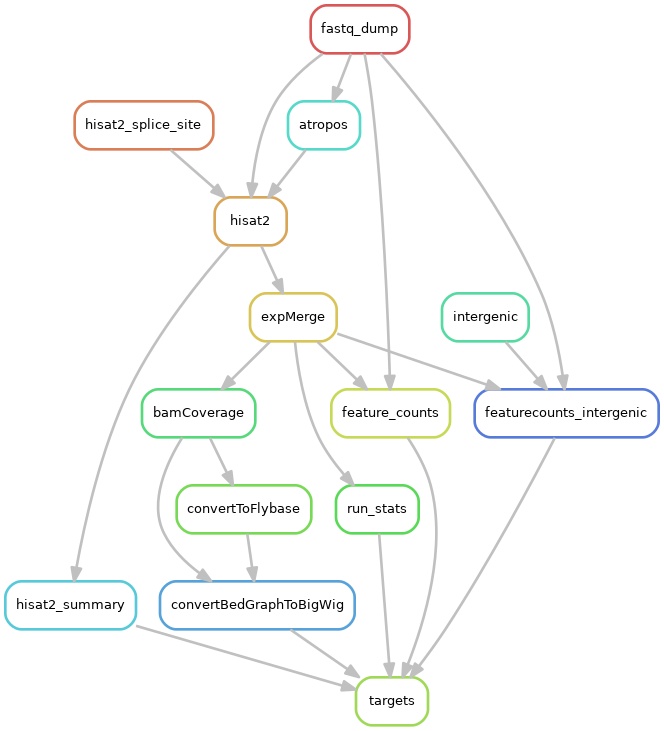

In [9]:
# Dag
Image('../output/figures/aln-wf_dag.png')

The goal of the alignment workflow is to take technical metadata generated by the pre-alignment workflow and align reads using the optimized setting for PE/SE and strandedness. The alignment workflow also mergest all technical replicates (SRR) to the library level (SRX). Finally the alignment workflow creates BigWigs, gene level counts, junction counts, and intergenic counts for each SRX.

## Software

* [fastq dump](https://ncbi.github.io/sra-tools/fastq-dump.html): Download FASTQ formated files from the SRA.
* [atropos](https://github.com/jdidion/atropos): A multi-threaded version of cutadapt, trims reads based on quality and adapter sequences.
* [hisat2](https://ccb.jhu.edu/software/hisat2/index.shtml): A common short read aligner.
* [feature counts](http://bioinf.wehi.edu.au/featureCounts/): Assigns reads to features (e.g. genes) and provides a set of feature level counts.
* [bamCoverage](http://deeptools.readthedocs.io/en/latest/content/tools/bamCoverage.html): Generates a bigwig from a bam file.
* [convertToFlyBase](https://github.com/lcdb/lcdblib/blob/master/lcdblib/utils/chrom_convert.py): Easily convert between flybase, UCSC, and NCBI chromosome names.
* [bedGraphToBigWig](https://genome.ucsc.edu/goldenpath/help/bigWig.html): UCSC's tool for converting bedgraphs to bigwigs.
* [samtools stats](http://www.htslib.org/doc/samtools.html): Calculates some basic statistics including things like percent mapping.
* [samtools idxstats](http://www.htslib.org/doc/samtools.html): Calculates statistics for each chromosome or scafold about the number of reads aligning.
* [bamtools stats](https://github.com/pezmaster31/bamtools): Very similar to samtools stats but has a few different stats.